In [1]:
from numpy import argmin
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy import asarray
from numpy import mean
from numpy import std
import pandas as pd
import seaborn as sns
import keras
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Importar Datos

In [2]:
data = pd.read_csv("DATA_SIR.csv", header=None)
data = data.rename(columns={0: 'N', 1:'V0', 2:'Rcont', 3:'fS_average', 4:"fI_average", 5:'fR_average'})
data['V0'] = data['V0'].astype(int)
data.head()

,N,V0,Rcont,fS_average,fI_average,fR_average
0,50,10,2.0,0.979800,0.020008,0.020200
1,80,10,2.0,0.987000,0.012561,0.013000
2,110,10,2.0,0.990000,0.009557,0.010000
3,140,10,2.0,0.991643,0.007501,0.008357
4,170,10,2.0,0.992118,0.006463,0.007882


# Red Neuronal MLP 
## Para lo valores de $f_I$
### Dividir los datos para entrenar el modelo MLP con los valores de la $f_I$

In [3]:
X, y = data.iloc[:,[0,1,2]].values , data.iloc[:, [4]].values #data.iloc[:,[3,4,5]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=123)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Procedimiento para encontrar el número de neuronas para el menor valor del MAE

In [4]:
n_neuronas = np.arange(10,105, 5)
n_neuronas2 = np.arange(125, 225, 25)
n_neuronas  = np.concatenate((n_neuronas, n_neuronas2))
n_neuronas

array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 125, 150, 175, 200])

In [5]:
def get_model(n_inputs, n_outputs, n_neuronas):
 model = Sequential()
 model.add(Dense(n_neuronas, input_dim=n_inputs,  activation='relu'))
 model.add(Dense(n_outputs, activation='sigmoid'))
 optimizer = keras.optimizers.AdamW(0.0001)
 model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
 return model

In [6]:
df = []
for n in n_neuronas:
    model = get_model(n_inputs=X.shape[1], n_outputs=y.shape[1], n_neuronas=n)
    model.fit(X_train, y_train, verbose=0, epochs=3000, batch_size=34, validation_split=0.2)
    test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
    df.append({'Neuronas': n, 'MAE': test_mae_score, 'MSE': test_mse_score})

pd.DataFrame(df)
df = pd.DataFrame(df)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2652e-04 - mae: 0.0112 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1916e-04 - mae: 0.0083 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4732e-04 - mae: 0.0091 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0542e-04 - mae: 0.0076 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0463e-04 - mae: 0.0080 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.5126e-05 - mae: 0.0075 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.2665e-05 - mae: 0.0072 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 1.0455e-04 - mae: 0.0078  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 7.6080e-05 - mae: 0.0066  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.6413e-05 - mae: 0.0064 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.5709e-05 - mae: 0.0067 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6505e-05 - mae: 0.0068 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8920e-05 - mae: 0.0060 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4084e-05 - mae: 0.0069 
4/4 ━━

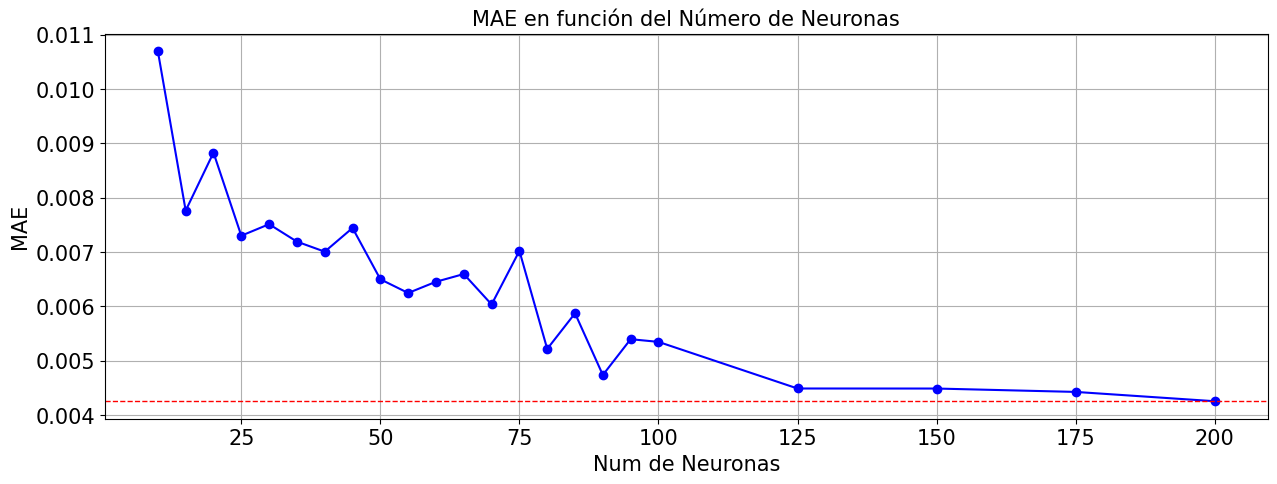

Valor min MAE con num Neuronas: 
     Neuronas       MAE       MSE
22       200  0.004253  0.000026


<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(df['Neuronas'], df['MAE'], marker='o', color='blue')
plt.grid(True)
plt.title('MAE en función del Número de Neuronas', size = 15)
plt.xlabel('Num de Neuronas', size = 15)
plt.axhline(df['MAE'].min(), color='r', linestyle='--', linewidth=1)
plt.ylabel('MAE', size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.savefig('Num_Neuronas_MAE.svg', format='svg')
plt.show()
plt.savefig("MAE_neuronas5", format='svg')
print('Valor min MAE con num Neuronas:','\n', df[df.MAE == df.MAE.min()])

### Entrenar el modelo con número de neuronas encontrado para solo $f_I$

In [5]:
def get_model(n_inputs, n_outputs, n_neuronas):
 model = Sequential()
 model.add(Dense(n_neuronas, input_dim=n_inputs,  activation='relu'))
 model.add(Dense(n_outputs,activation='sigmoid'))
 optimizer = keras.optimizers.AdamW(0.0001)
 model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
 return model

model = get_model(n_inputs=X.shape[1], n_outputs=y.shape[1], n_neuronas=125)
model.fit(X_train, y_train, verbose=0, epochs=3000, batch_size=34, validation_split=0.2)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 125)            │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,880 (7.35 KB)

 Trainable params: 626 (2.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,254 (4.90 KB)

### Valor de MAE del modelo MLP

In [6]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
print(test_mae_score)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7635e-05 - mae: 0.0050 
0.004865617956966162


### Comparación de datos de test con las predicciones del modelo para la $f_I$

In [7]:
predicciones = model.predict(X_test)
predicciones.shape, X_test.shape, y_test.shape

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


((100, 1), (100, 3), (100, 1))

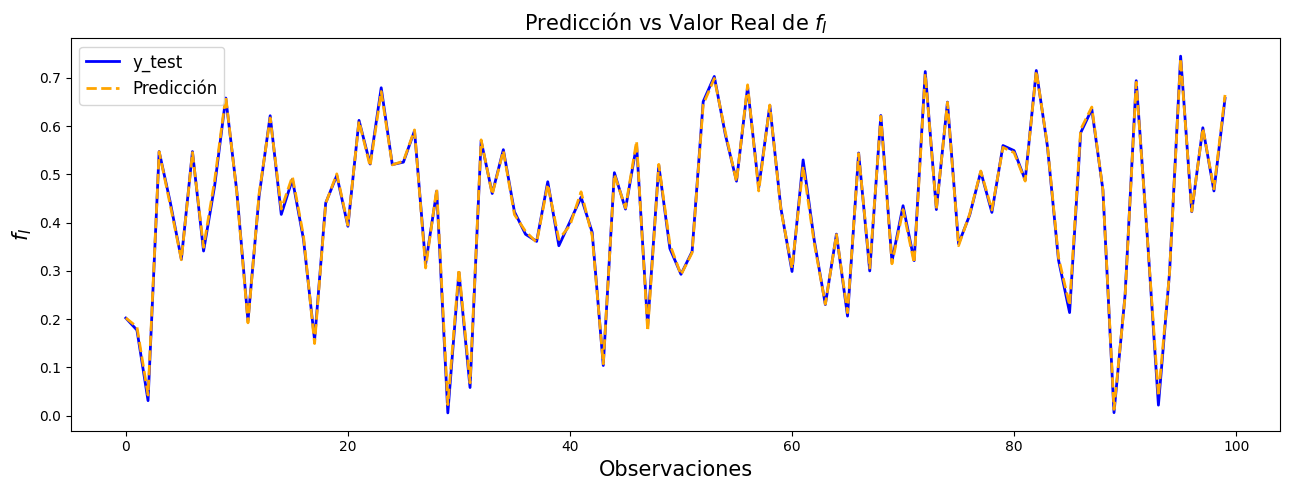

In [8]:
plt.figure(figsize=(13, 5))
plt.plot(y_test, label='y_test', color='b', linewidth=2)
plt.plot(predicciones, label='Predicción', color='orange', linestyle='--', linewidth=2)  # Línea segmentada
plt.xlabel("Observaciones", size=15)
plt.ylabel("$f_I$", size=15)
plt.legend(fontsize=12)  # Agrandar la leyenda
plt.title('Predicción vs Valor Real de $f_I$', size=15)
plt.tight_layout()
plt.savefig("pred_test_fI", format="svg")
plt.show()

# Entrenar el modelo con las dos funciones ($f_I$ y $f_S$) 

### Agregamos la $f_S$ al conjunto de variables dependientes para el modelo MLP, resultando dos neuronas en la capa de salida

In [29]:
X, y = data.iloc[:,[0,1,2]].values , data.iloc[:, [3, 4]].values #data.iloc[:,[3,4,5]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=123)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
def get_model(n_inputs, n_outputs, n_neuronas):
 model = Sequential()
 model.add(Dense(n_neuronas, input_dim=n_inputs,  activation='relu'))
 model.add(Dense(n_outputs,activation='sigmoid'))
 optimizer = keras.optimizers.AdamW(0.0001)
 model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
 return model

model = get_model(n_inputs=X.shape[1], n_outputs=y.shape[1], n_neuronas=175)
model.fit(X_train, y_train, verbose=0, epochs=3000, batch_size=34, validation_split=0.2)
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 175)            │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │           352 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,158 (12.34 KB)

 Trainable params: 1,052 (4.11 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,106 (8.23 KB)

In [31]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
print(test_mae_score)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0696e-04 - mae: 0.0058 
0.005569773726165295


In [32]:
predicciones = model.predict(X_test)
predicciones.shape, X_test.shape, y_test.shape

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


((100, 2), (100, 3), (100, 2))

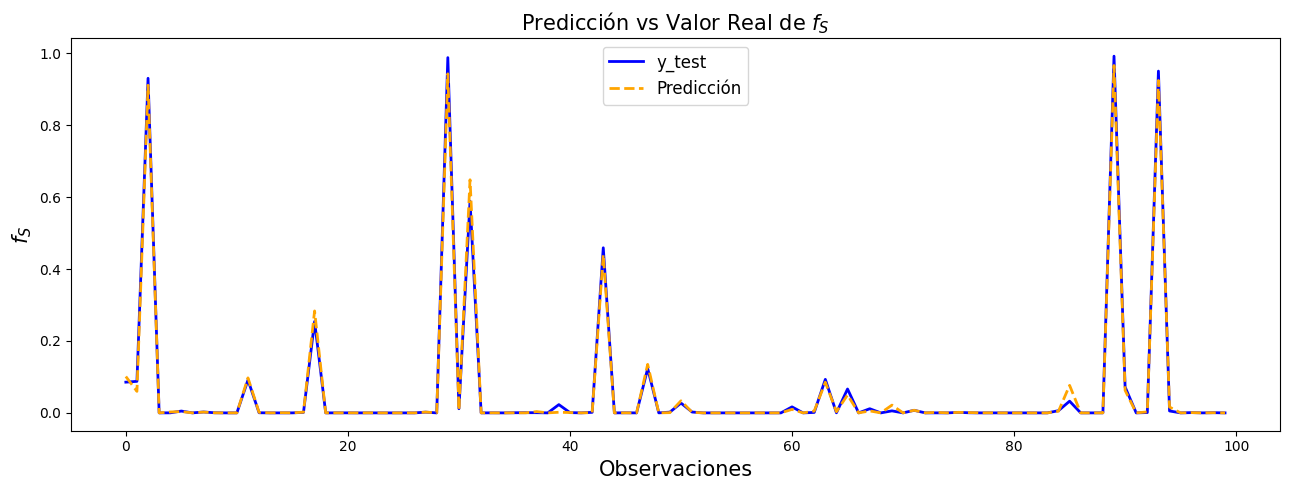

In [33]:
plt.figure(figsize=(13, 5))
plt.plot(y_test[:,0], label='y_test', color='b', linewidth=2)
plt.plot(predicciones[:,0], label='Predicción', color='orange', linestyle='--', linewidth=2)  # Línea segmentada
plt.xlabel("Observaciones", size=15)
plt.ylabel("$f_S$", size=15)
plt.legend(fontsize=12)  # Agrandar la leyenda
plt.title('Predicción vs Valor Real de $f_S$', size=15)
plt.tight_layout()
plt.savefig("pred_test_fS", format="svg")
plt.show()

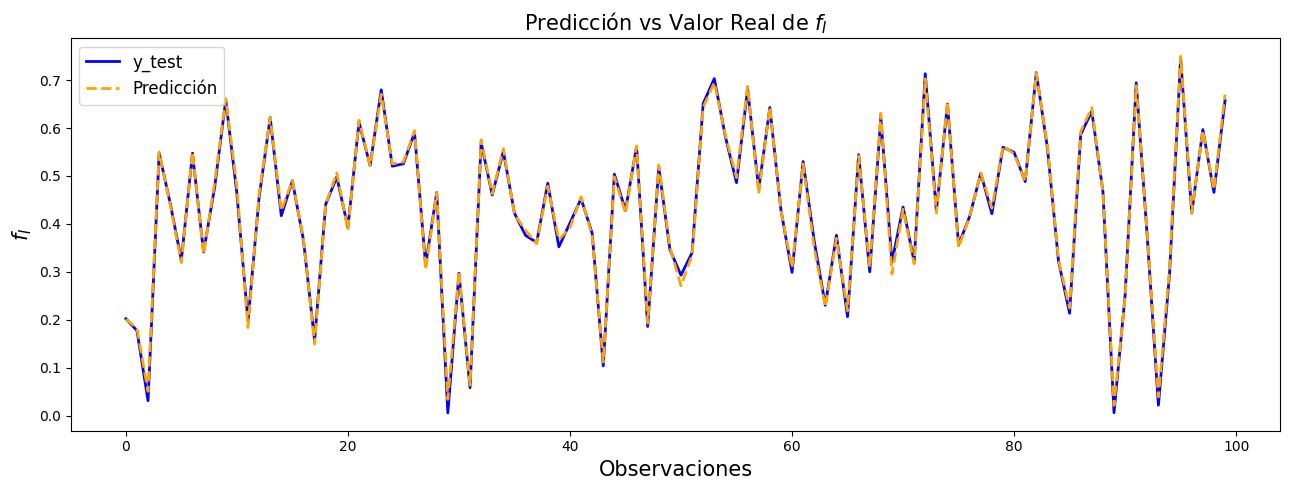

In [34]:
plt.figure(figsize=(13, 5))
plt.plot(y_test[:,1], label='y_test', color='b', linewidth=2)
plt.plot(predicciones[:,1], label='Predicción', color='orange', linestyle='--', linewidth=2)  # Línea segmentada
plt.xlabel("Observaciones", size=15)
plt.ylabel("$f_I$", size=15)
plt.legend(fontsize=12)  # Agrandar la leyenda
plt.title('Predicción vs Valor Real de $f_I$', size=15)
plt.tight_layout()
plt.savefig("pred_test_fI", format="svg")
plt.show()

### Reconstrucción de los valores de la $f_I$ y $f_S$ con el modelo final MLP para puntos nuevos dentro del rango entrenado con $R_{cont} = 2$

In [49]:
def generar_datos(N_valores, v0_valores, ndata): #v0_valores
    datos = []
    for n in N_valores:
        for v0 in v0_valores:
            datos.extend([[n, v0]])
    return np.array(datos)

In [50]:
ndata=100
N_valores = np.linspace(50,300,ndata)
v0_valores = np.linspace(10,30,ndata)
datos = generar_datos(N_valores, v0_valores, ndata)

In [51]:
datadf = pd.DataFrame(datos, columns=['N', 'V0'])
datadf['Rcont'] = 2
datadf = datadf.reindex(columns=['N', 'V0', 'Rcont'])
datadf

,N,V0,Rcont
0,50.0,10.000000,2
1,50.0,10.202020,2
2,50.0,10.404040,2
3,50.0,10.606061,2
4,50.0,10.808081,2
...,...,...,...
9995,300.0,29.191919,2
9996,300.0,29.393939,2
9997,300.0,29.595960,2
9998,300.0,29.797980,2


### Predicción para ese conjunto de puntos

In [52]:
datapredecir = scaler.transform(datadf)
predicciones = model.predict(datapredecir)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step


In [53]:
datadf['fI_average_pred'] = predicciones[:,1]#.round(decimals=1)
datadf['fS_average_pred'] = predicciones[:,0]#.round(decimals=1)
datadf['N'] = datadf['N']#.round(decimals=1)
datadf['V0'] = datadf['V0']#.round(decimals=1)
datadf

,N,V0,Rcont,fI_average_pred,fS_average_pred
0,50.0,10.000000,2,0.004764,0.987506
1,50.0,10.202020,2,0.004981,0.986978
2,50.0,10.404040,2,0.005215,0.986406
3,50.0,10.606061,2,0.005463,0.985796
4,50.0,10.808081,2,0.005724,0.985157
...,...,...,...,...,...
9995,300.0,29.191919,2,0.390798,0.000085
9996,300.0,29.393939,2,0.392168,0.000079
9997,300.0,29.595960,2,0.393515,0.000073
9998,300.0,29.797980,2,0.394855,0.000067


In [54]:
d1 = datadf['fI_average_pred'] > 1
d1[d1 == False].count()

10000

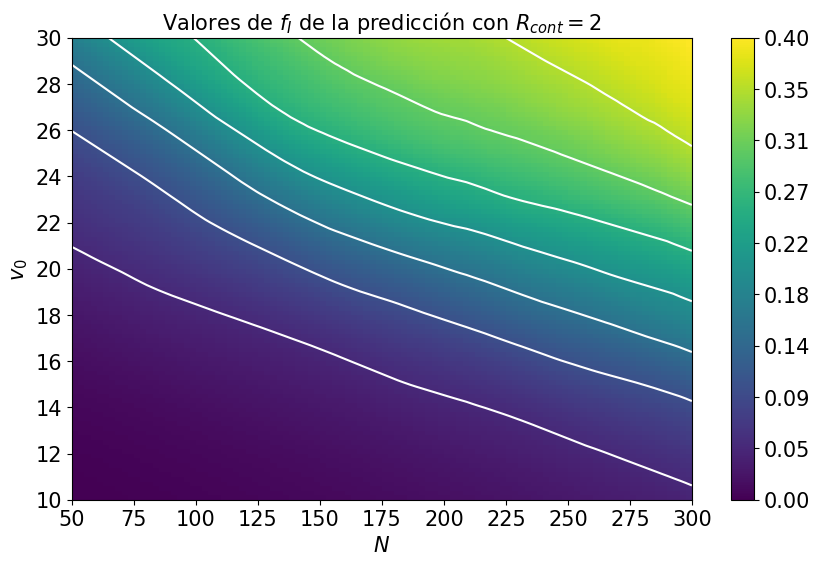

In [55]:
dataheatmap = datadf.pivot_table(values='fI_average_pred', index='V0', columns='N')
v0_values = dataheatmap.index
N_values = dataheatmap.columns
N, V0 = np.meshgrid(N_values, v0_values)
Z = dataheatmap.values


plt.figure(figsize=(10, 6))
contour = plt.contour(N_values, v0_values, Z, colors = "white")

max_value = Z.max() 
min_value = Z.min()


plt.imshow(Z, extent=[N_values.min(), N_values.max(), v0_values.min(), v0_values.max()], 
           origin='lower', cmap='viridis', alpha=1, aspect='auto')

ticks = np.linspace(min_value, max_value, num=10)
cbar = plt.colorbar(ticks=ticks)
cbar.ax.tick_params(labelsize=15)


cbar_labels = [f'{tick:.2f}' for tick in ticks]
cbar.set_ticklabels(cbar_labels)


plt.xticks(np.arange(50, 325, 25))
plt.yticks(np.arange(10, 31, 2))
plt.xlabel('$N$', fontsize = 15)
plt.ylabel('$v_0$', fontsize = 15)
plt.title('Valores de $f_I$ de la predicción con $R_{cont} = 2$', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.savefig('fI_pred_rcont2.svg', format='svg')
plt.show()


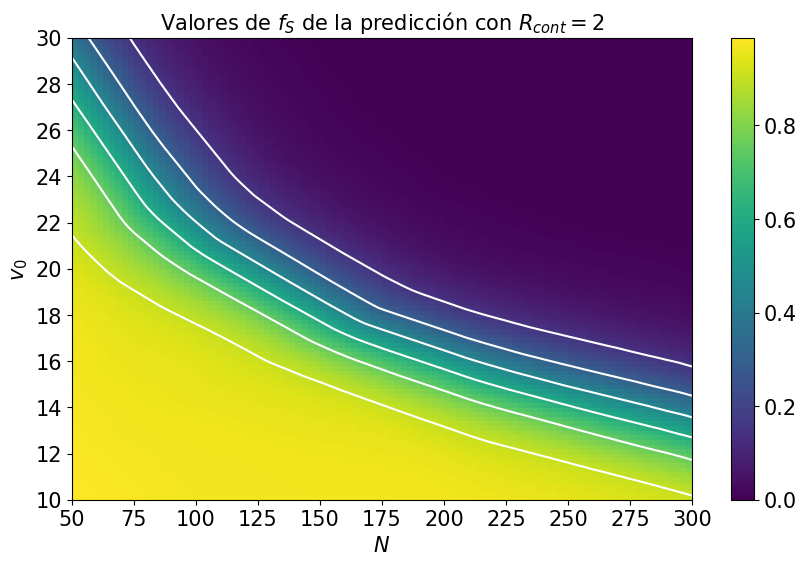

In [57]:
dataheatmap = datadf.pivot_table(values='fS_average_pred', index='V0', columns='N')
v0_values = dataheatmap.index
N_values = dataheatmap.columns
N, V0 = np.meshgrid(N_values, v0_values)
Z = dataheatmap.values

plt.figure(figsize=(10, 6))
contour = plt.contour(N_values, v0_values, Z, colors = "white")

max_value = Z.max() + 0.05
min_value = Z.min()


plt.imshow(Z, extent=[N_values.min(), N_values.max(), v0_values.min(), v0_values.max()], 
           origin='lower', cmap='viridis', alpha=1, aspect='auto',)

cbar = plt.colorbar(ticks=np.arange(min_value, max_value , 0.2))
cbar.ax.tick_params(labelsize=15)


plt.xticks(np.arange(50, 325, 25))
plt.yticks(np.arange(10, 31, 2))
plt.xlabel('$N$', fontsize = 15)
plt.ylabel('$v_0$', fontsize = 15)
plt.title('Valores de $f_S$ de la predicción con $R_{cont} = 2$', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.savefig('fS_pred_rcont2.svg', format='svg')
plt.show()

### Ahora para $R_{cont} = 3$

In [68]:
datadf = pd.DataFrame(datos, columns=['N', 'V0'])
datadf['Rcont'] = 3
datadf = datadf.reindex(columns=['N', 'V0', 'Rcont'])
datadf

,N,V0,Rcont
0,50.0,10.000000,3
1,50.0,10.202020,3
2,50.0,10.404040,3
3,50.0,10.606061,3
4,50.0,10.808081,3
...,...,...,...
9995,300.0,29.191919,3
9996,300.0,29.393939,3
9997,300.0,29.595960,3
9998,300.0,29.797980,3


In [69]:
datapredecir = scaler.transform(datadf)
predicciones = model.predict(datapredecir)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step


In [70]:
datadf['fI_average_pred'] = predicciones[:,1]#.round(decimals=1)
datadf['fS_average_pred'] = predicciones[:,0]#.round(decimals=1)
datadf['N'] = datadf['N']#.round(decimals=1)
datadf['V0'] = datadf['V0']#.round(decimals=1)
datadf

,N,V0,Rcont,fI_average_pred,fS_average_pred
0,50.0,10.000000,3,0.136310,4.129464e-01
1,50.0,10.202020,3,0.138983,3.943895e-01
2,50.0,10.404040,3,0.141723,3.760026e-01
3,50.0,10.606061,3,0.144713,3.579729e-01
4,50.0,10.808081,3,0.147797,3.403894e-01
...,...,...,...,...,...
9995,300.0,29.191919,3,0.773600,2.824691e-11
9996,300.0,29.393939,3,0.773940,2.627027e-11
9997,300.0,29.595960,3,0.774279,2.443196e-11
9998,300.0,29.797980,3,0.774617,2.272224e-11


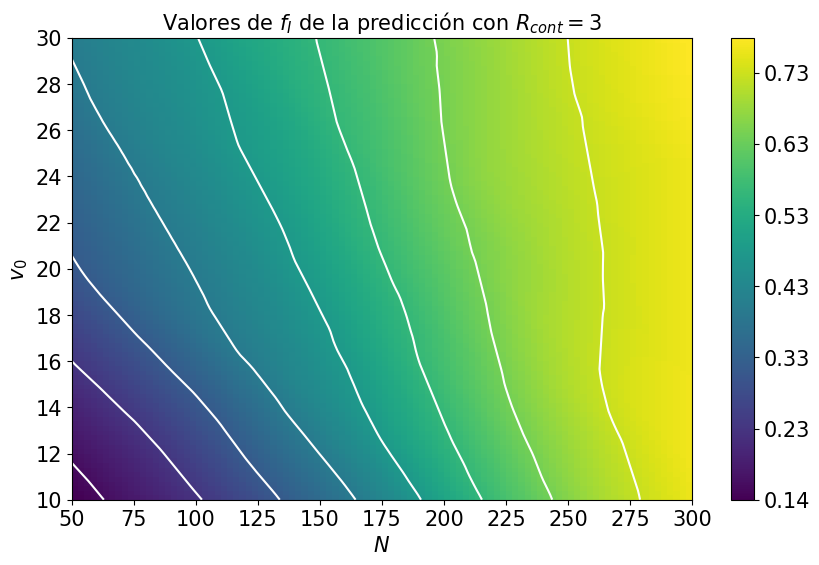

In [67]:
dataheatmap = datadf.pivot_table(values='fI_average_pred', index='V0', columns='N')
v0_values = dataheatmap.index
N_values = dataheatmap.columns
N, V0 = np.meshgrid(N_values, v0_values)
Z = dataheatmap.values

plt.figure(figsize=(10, 6))
contour = plt.contour(N_values, v0_values, Z, colors = "white")

max_value = Z.max() + 0.05
min_value = Z.min()


plt.imshow(Z, extent=[N_values.min(), N_values.max(), v0_values.min(), v0_values.max()], 
           origin='lower', cmap='viridis', alpha=1, aspect='auto')

ticks = np.linspace(min_value, max_value, num=8)
cbar = plt.colorbar(ticks=ticks)
cbar.ax.tick_params(labelsize=15)


cbar_labels = [f'{tick:.2f}' for tick in ticks]
cbar.set_ticklabels(cbar_labels)


plt.xticks(np.arange(50, 325, 25))
plt.yticks(np.arange(10, 31, 2))
plt.xlabel('$N$', fontsize = 15)
plt.ylabel('$v_0$', fontsize = 15)
plt.title('Valores de $f_I$ de la predicción con $R_{cont} = 3$', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.savefig('fI_pred_rcont3.svg', format='svg')
plt.show()

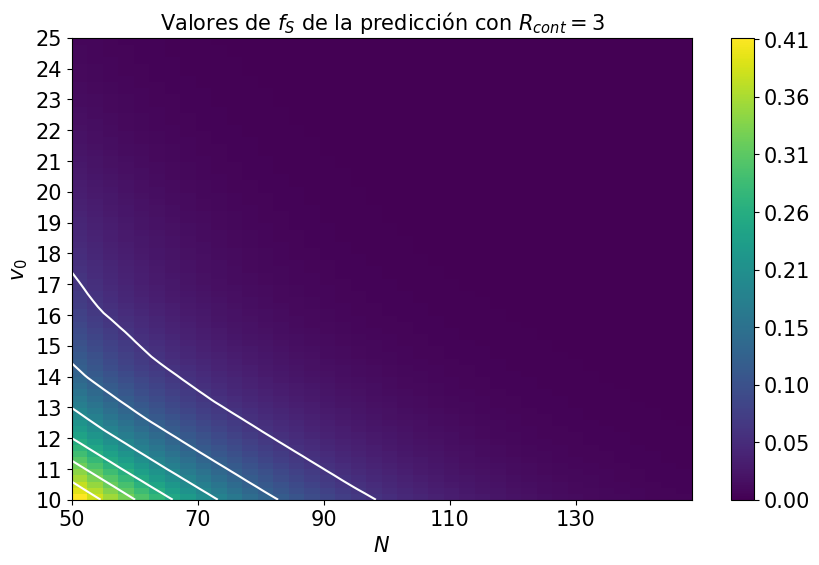

In [77]:
dataheatmap = datadf.pivot_table(values='fS_average_pred', index='V0', columns='N')
dataheatmap = dataheatmap.loc[10:25, 50:150]
v0_values = dataheatmap.index
N_values = dataheatmap.columns
N, V0 = np.meshgrid(N_values, v0_values)
Z = dataheatmap.values

plt.figure(figsize=(10, 6))
contour = plt.contour(N_values, v0_values, Z, colors = "white")

max_value = Z.max() + 0.05
min_value = Z.min()


plt.imshow(Z, extent=[N_values.min(), N_values.max(), v0_values.min(), v0_values.max()], 
           origin='lower', cmap='viridis', alpha=1, aspect='auto')

ticks = np.linspace(min_value, max_value, num=10)
cbar = plt.colorbar(ticks=ticks)
cbar.ax.tick_params(labelsize=15)


cbar_labels = [f'{tick:.2f}' for tick in ticks]
cbar.set_ticklabels(cbar_labels)


plt.xticks(np.arange(50, 150 ,20))
plt.yticks(np.arange(10, 26,1))
plt.xlabel('$N$', fontsize = 15)
plt.ylabel('$v_0$', fontsize = 15)
plt.title('Valores de $f_S$ de la predicción con $R_{cont} = 3$', fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.savefig('fS_pred_rcont3.svg', format='svg')
plt.show()